In [5]:
import sys
sys.path.append(r'C:\Users\Daniyar Syrlybayev\Desktop\Masters Thesis\Lattice_Structures_Data_Analysis')
import lattice_compression as lc
import os
import pandas as pd

In [64]:
import imp
imp.reload(lc)

<module 'lattice_compression' from 'C:\\Users\\Daniyar Syrlybayev\\Desktop\\Masters Thesis\\Lattice_Structures_Data_Analysis\\lattice_compression.py'>

In [6]:
phys_props = pd.read_excel(r"C:\Users\Daniyar Syrlybayev\Desktop\Masters Thesis\Lattice Structures.xlsx", sheet_name = 'TPMS')

In [7]:
phys_props

,Lattice Structure,Relative Density,Mass 1,Volume 1,Relative Density 1,Mass 2,Volume 2,Relative Density 2,Mass 3,Volume 3,Relative Density 3,Nominal Volume (mm^3),Nominal Mass,Width,Len,Height,Path
0,Gyroid,0.20,15.79,5931.630353,0.219690,15.51,5826.446281,0.215794,15.58,5852.742299,0.216768,5400,14.376323,30,30,30,C:\Users\Daniyar Syrlybayev\Desktop\Masters Th...
1,Gyroid,0.25,19.57,7351.615327,0.272282,19.24,7227.648385,0.267691,19.16,7197.595793,0.266578,6750,17.970404,30,30,30,C:\Users\Daniyar Syrlybayev\Desktop\Masters Th...
2,Gyroid,0.30,22.96,8625.093914,0.319448,23.11,8681.442524,0.321535,22.87,8591.284748,0.318196,8100,21.564484,30,30,30,C:\Users\Daniyar Syrlybayev\Desktop\Masters Th...
3,Diamond,0.15,11.86,4455.296769,0.165011,12.18,4575.507137,0.169463,12.02,4515.401953,0.167237,4050,10.782242,30,30,30,NaN
4,Diamond,0.20,15.67,5886.551465,0.218020,15.44,5800.150263,0.214820,15.64,5875.281743,0.217603,5400,14.376323,30,30,30,NaN
5,Diamond,0.25,19.50,7325.319309,0.271308,19.41,7291.510143,0.270056,19.34,7265.214125,0.269082,6750,17.970404,30,30,30,NaN
6,Diamond,0.30,23.00,8640.120210,0.320004,22.89,8598.797896,0.318474,22.74,8542.449286,0.316387,8100,21.564484,30,30,30,NaN
7,I-WP,0.20,15.99,6006.761833,0.222473,16.04,6025.544703,0.223168,15.78,5927.873779,0.219551,5400,14.376323,30,30,30,NaN
8,I-WP,0.25,19.53,7336.589031,0.271726,19.64,7377.911345,0.273256,19.42,7295.266717,0.270195,6750,17.970404,30,30,30,NaN
9,I-WP,0.30,23.49,8824.192337,0.326822,23.45,8809.166041,0.326265,23.47,8816.679189,0.326544,8100,21.564484,30,30,30,NaN


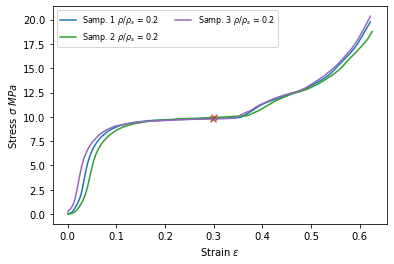

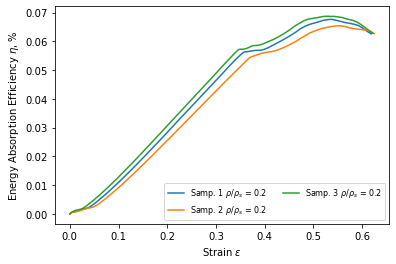

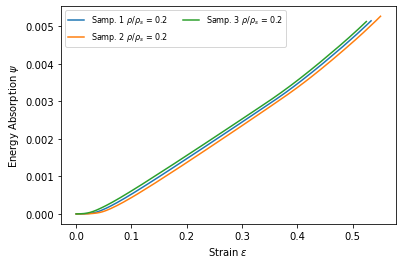

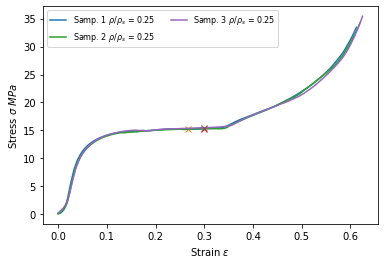

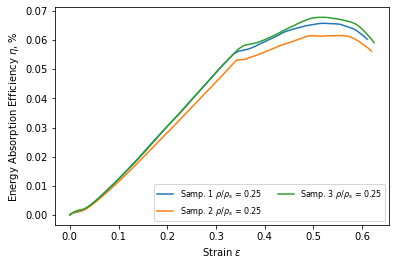

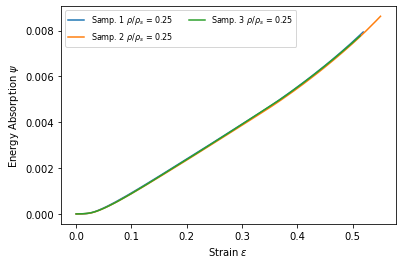

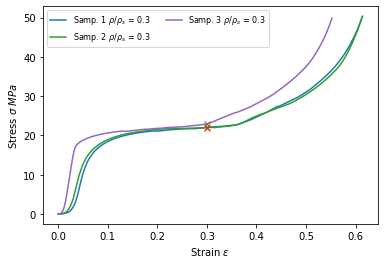

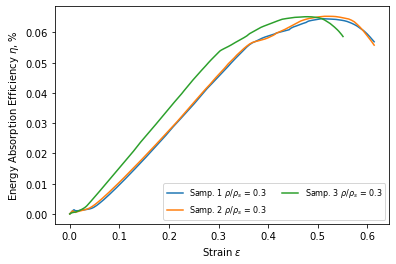

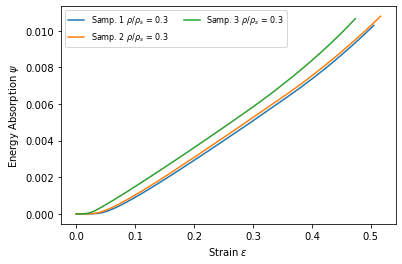

In [67]:
lats = []
labels = [r'Samp. 1 $\rho$/${\rho}_s$ = ', r'Samp. 2 $\rho$/${\rho}_s$ = ', r'Samp. 3 $\rho$/${\rho}_s$ = ']
save_path = r'C:\Users\Daniyar Syrlybayev\Desktop\Masters Thesis\Results Gyroid'
savenames = ['SS_0_2', 'SS_0_25', 'SS_0_3']
savenames2 = ['En_abs_eff_0_2', 'En_abs_eff_0_25', 'En_abs_eff_0_3']
savenames3 = ['En_abs_0_2', 'En_abs_0_25', 'En_abs_0_3']
for i in range(3):
    lattices = []
    data = phys_props.loc[i, :]
    for path in os.listdir(data['Path']):
        lattice = lc.process_lattice(data['Path'] + '\\' + path, (data['Width'], data['Len']), data['Relative Density'], 
                                     data['Height'],
                                 data['Nominal Mass'], data['Lattice Structure'], limit1 = 0.024, limit2 = 0.025)
        lattices.append(lattice)
    lc.plot_stress_strain_curve(*lattices, savepath = save_path, save_name = savenames[i], labels = 
                        list(map(lambda x: x + str(data['Relative Density']), labels)))
    lc.plot_energy_absorption_eff_curve(*lattices, savepath = save_path, save_name = savenames2[i], 
                                        labels = 
                        list(map(lambda x: x + str(data['Relative Density']), labels)))
    lc.plot_energy_absorption_curve(*lattices, savepath = save_path, save_name = savenames3[i], 
                                        labels = 
                        list(map(lambda x: x + str(data['Relative Density']), labels)))
    lats.append(lattices)


In [52]:
list(phys_props.loc[0:2, 'Relative Density'])

[0.2, 0.25, 0.3]

In [85]:
A = pd.DataFrame(lats[0][1].props, index=[0])

In [86]:
B = pd.DataFrame(lats[0][0].props, index=[0])

In [87]:
A.append(B)

,Lattice,Mass (g),Relative Density,Strengh,Disp,Elastic Modulus,Maximum Energy Absorption Efficiency,Densification Strain,Maximum Energy Absorption,Plateau Stress
0,Gyroid,14.376323,0.2,9.933889,0.299667,68.177830,0.065410,0.553567,0.005269,11.664851
0,Gyroid,14.376323,0.2,9.829888,0.298200,132.829206,0.067641,0.536433,0.005147,11.576474
